0. Context

O código utiliza uma árvore de decisão para classificar espécies de pinguins com base em atributos demográficos e físicos, como medidas de tamanhos e peso. O modelo é treinado com um conjunto de dados contendo essas informações e constrói uma estrutura de decisão que segmenta os dados de acordo com condições específicas dos atributos. Isso permite uma classificação precisa das espécies de pinguins, oferecendo uma ferramenta eficaz para análise das características que distinguem cada espécie.

1. Packages and libraries:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


2. Loads:

In [2]:
data = sns.load_dataset('penguins')

3. Exploratory data analysis:

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


3.1 Dictionary:

In [4]:
dict_columns = {
  "species": "Coluna categórica com as espécies dos pinguins",
  "island": "Coluna categórica com os nomes das ilhas onde os pinguins foram encontrados",
  "bill_length_mm": "Coluna numérica com o comprimento do bico dos pinguins em milímetros",
  "bill_depth_mm": "Coluna numérica com a profundidade do bico dos pinguins em milímetros",
  "flipper_length_mm": "Coluna numérica com o comprimento da nadadeira dos pinguins em milímetros",
  "body_mass_g": "Coluna numérica com a massa corporal dos pinguins em gramas",
  "sex": "Coluna categórica com o sexo dos pinguins (macho ou fêmea)"
}

3.2 Numeric attributes by species:

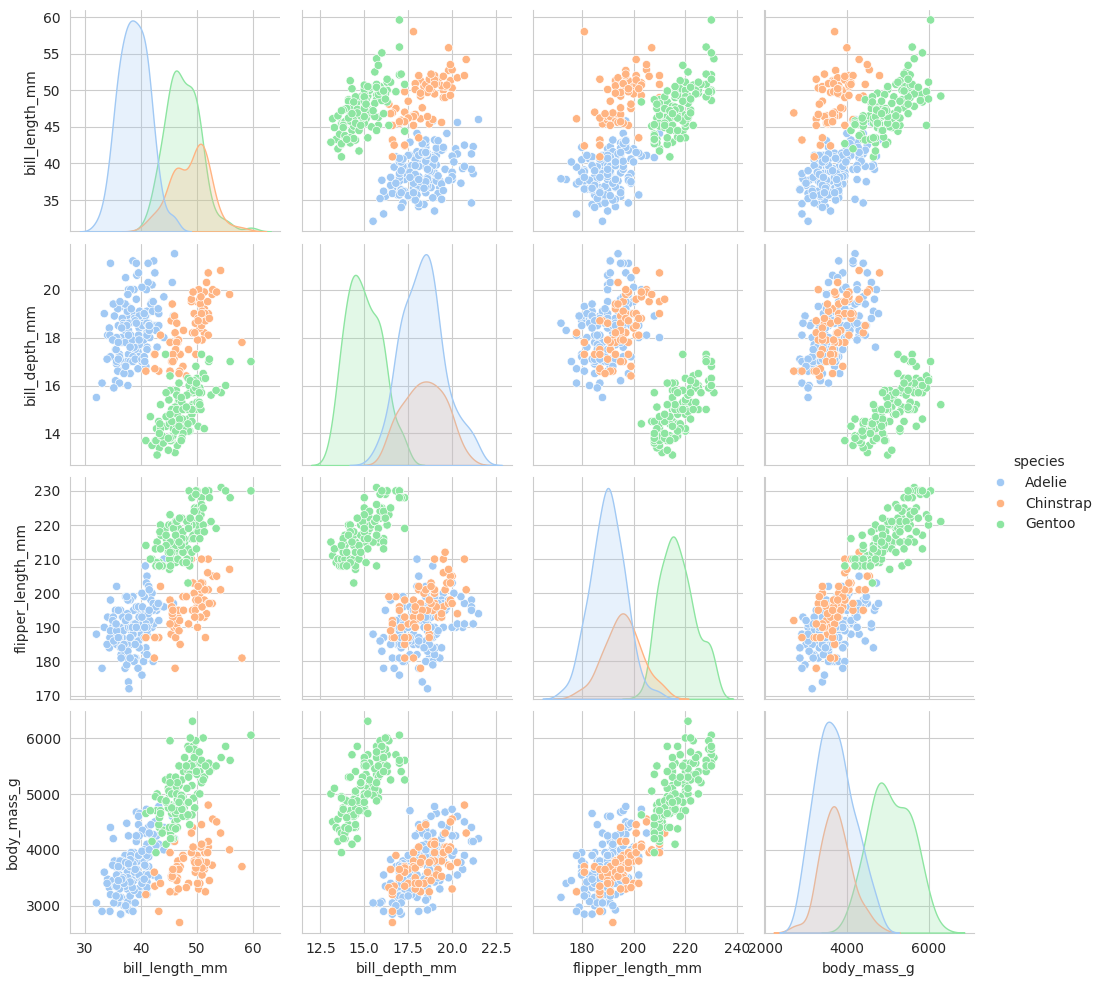

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=data.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

É perceptível que há correlações postivas em várias situações, porém tambémm é notável que existem correlações positivas entre várias características físicas das espécies. No entanto, o ponto mais destacado é que as características físicas da espécie 'Adelie' mostram uma considerável sobreposição com as de outras espécies. Em particular, essa sobreposição é mais pronunciada em comparação com as demais espécies.

Quando correlacionamos esses dados com o gráfico 'Insland by Species', observamos que a espécie Adelie está presente em todas as ilhas. Além disso, suas características físicas são muito semelhantes às da espécie 'Chinstrap'. Na ilha onde a espécie 'Chinstrap' é predominante, o número de indivíduos de 'Adelie' é quase igual, assim como suas características físicas.

Essa similaridade nas características físicas e a presença de 'Adelie' em todas as ilhas indicam que pode ser um desafio significativo para a classificação correta dessa espécie em um modelo de árvore de decisão.

3.3 Sex by species:

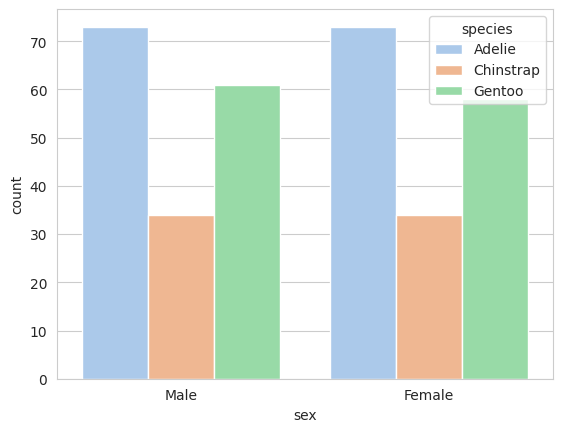

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=data, x='sex', hue="species", palette="pastel")

O gráfico mostra queo dataset apresenta um número igual de indivídos machos e fêmeas para cada espécie. A espécie 'Adelie' está em grande quantidade com um pouco mais de 140 indivídos, em seguida a espécie 'Gentoo' com 120 indivídos e por último a espécie 'Chinstrap' com um pouco mais de 60 indivídos. 

3.4 Island by species:

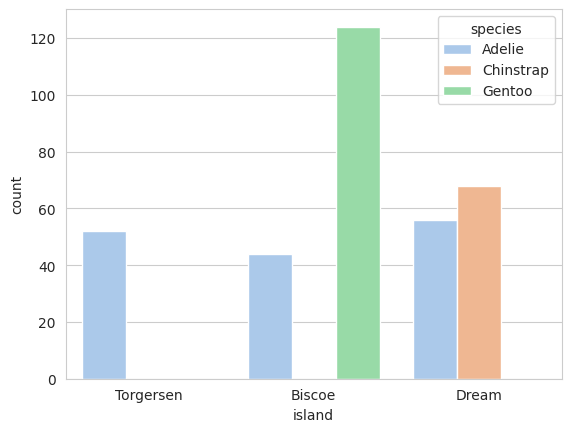

In [7]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=data, x='island', hue="species", palette="pastel")

A espécie 'Adelie' está bem distribuida em todas as três ilhas, enquanto a espécie Gentto está apenas na ilha 'Biscoe', assim como a espécie 'Chinstrap' está apenas na ilha 'Dream'.

4. Data:

4.1 Null values:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


4.1.1 Null values ​​in categorical columns:



In [9]:
# Calculando a média de cada coluna com atributos numéricos  

bill_lenght_mean = round(data['bill_length_mm'].mean(), 1)
print(bill_lenght_mean)
bill_depth_mean = round(data['bill_depth_mm'].mean(), 1)
print(bill_depth_mean)
flipper_lenght_mean = round(data['flipper_length_mm'].mean(), 1)
print(flipper_lenght_mean)
body_mass_mean = round(data['body_mass_g'].mean(), 1)
print(body_mass_mean)

# Preenchendo os valores NaN com o método fillna

data['bill_length_mm'].fillna(bill_lenght_mean, inplace=True)
data['bill_depth_mm'].fillna(bill_depth_mean, inplace=True)
data['flipper_length_mm'].fillna(flipper_lenght_mean, inplace=True)
data['body_mass_g'].fillna(body_mass_mean, inplace=True)

43.9
17.2
200.9
4201.8


4.1.2 Null values ​​in categorical columns:

In [10]:
sex_mode = data['sex'].mode()[0]
print(sex_mode)

Male


In [11]:
# Aplicando uma função lambda na coluna 'sex' que verifica se o valor da coluna é NaN e substitue pela medo
data['sex'] = data['sex'].apply(lambda x: sex_mode if pd.isna(x) else x)

In [12]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,43.9,17.2,200.9,4201.8,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [13]:
# Verificando se ainda há valores nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


5. Nominal and Ordinal Categorical Variables:

In [14]:
# Realziando a codificação dos atributos categóricos

one_hot_island = pd.get_dummies(data['island']) 
one_hot_sex = pd.get_dummies(data['sex'])


# Adicionando as novas variáveis binárias ao dataframe original 

data = pd.concat([data, one_hot_island], axis=1) 
data = pd.concat([data, one_hot_sex], axis=1) 
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen,Female,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False,False,True,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False,False,True,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False,False,True,True,False
3,Adelie,Torgersen,43.9,17.2,200.9,4201.8,Male,False,False,True,False,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False,False,True,True,False


In [15]:
# Renomeando as colunas nominais codificadas

data['isld_biscoe_nom'] = data['Biscoe']
data['isld_dream_nom'] = data['Dream']
data['isld_torgersen_nom'] = data['Torgersen']
data['female_nom'] = data['Female']
data['male_nom'] = data['Male']


In [16]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen,Female,Male,isld_biscoe_nom,isld_dream_nom,isld_torgersen_nom,female_nom,male_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False,False,True,False,True,False,False,True,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False,False,True,True,False,False,False,True,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False,False,True,True,False,False,False,True,True,False
3,Adelie,Torgersen,43.9,17.2,200.9,4201.8,Male,False,False,True,False,True,False,False,True,False,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False,False,True,True,False,False,False,True,True,False


6. Dataframe cleaning:

In [17]:
# Limpando as colunas redundantes do dataframe

data = data.drop(['island', 
                  'sex', 
                  'Biscoe',
                  'Dream', 
                  'Torgersen', 
                  'Female', 
                  'Male'], axis=1)

# Reordenando as colunas do dataframe

colunas_ordenadas = [
    'species', 
    'isld_biscoe_nom', 
    'isld_dream_nom', 
    'isld_torgersen_nom', 
    'female_nom',
    'male_nom',
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g'
    ]
data = data[colunas_ordenadas]

In [18]:
data.head()

,species,isld_biscoe_nom,isld_dream_nom,isld_torgersen_nom,female_nom,male_nom,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,False,False,True,False,True,39.1,18.7,181.0,3750.0
1,Adelie,False,False,True,True,False,39.5,17.4,186.0,3800.0
2,Adelie,False,False,True,True,False,40.3,18.0,195.0,3250.0
3,Adelie,False,False,True,False,True,43.9,17.2,200.9,4201.8
4,Adelie,False,False,True,True,False,36.7,19.3,193.0,3450.0


8. Model training & testing

8.1 Separation of database for training and testing

In [19]:
# Distribuindo os dados em treino e teste utilizando a proporção 2/3 para treino e 1/3 para teste


predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['species'], axis=1), 
    data['species'], 
    test_size=1/3, 
    random_state=123
)


In [20]:
predictors_train.shape

(229, 9)

In [21]:
predictors_test.shape

(115, 9)

In [22]:
target_train.shape

(229,)

In [23]:
target_test.shape

(115,)

8.2 Training the model:

In [24]:
# Criando uma instância do modelo de regressão linear

model = DecisionTreeClassifier()

In [25]:
#  Treinando o modelo de regressão linear usando os dados de treinamento e obtendo os coeficientes angulares e lineares

model = model.fit(predictors_train, target_train)
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['isld_biscoe_nom', 'isld_dream_nom', 'isld_torgersen_nom',
        'female_nom', 'male_nom', 'bill_length_mm', 'bill_depth_mm',
        'flipper_length_mm', 'body_mass_g'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x21ce6206170>}

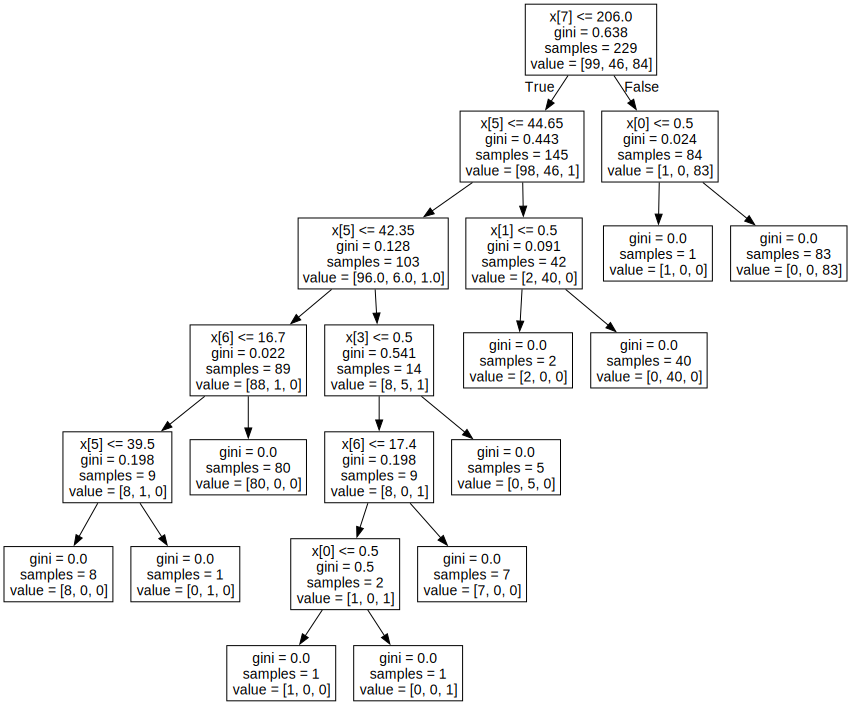

In [26]:
# Gerando a visualização da árvore de decisão criada pelo modelo 

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

A árvore gerada por esse modelo possui 11 folhas.

In [27]:
# Gerando previsões para o conjunto de dados de teste usando o modelo treinado

target_predicted = model.predict(predictors_test)
target_predicted[0:5]

array(['Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap'], dtype=object)

In [28]:
# Verificando se a quantidade bate com a proporção 

target_predicted.shape

(115,)

In [29]:
# Puxando uma amostra dos dados de teste para verificar se bate com as previsões geradas 

target_test[0:5]

309       Gentoo
234       Gentoo
143       Adelie
20        Adelie
190    Chinstrap
Name: species, dtype: object

9. Assessment:

In [30]:
# Gerando a matrix de confusão para o modelo treinado

confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[53  0  0]
 [ 5 17  0]
 [ 1  0 39]]


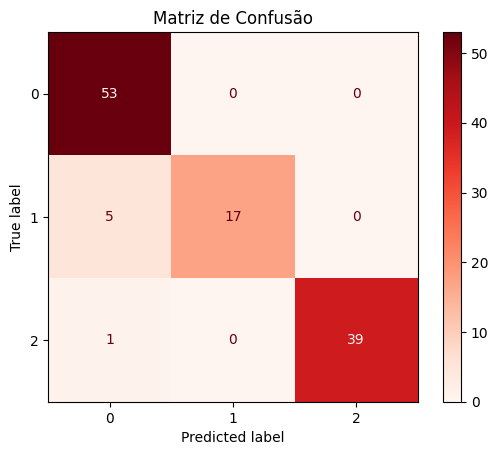

In [43]:
# Criando o objeto ConfusionMatrixDisplay
CMg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

# Plot
CMg.plot(cmap='Reds', values_format='d')
plt.title('Matriz de Confusão')
plt.show()


O modelo acertou todas as amostras da Classe 0 e da Classe 2, e cometeu poucos erros na Classe 1, onde 5 amostras foram incorretamente classificadas como Classe 0. No geral, o desempenho é excelente.

In [32]:
# Calculando o valor da acurácia do modelo

acuracia_tree = accuracy_score(target_test, target_predicted)
print(f"{round(100 * acuracia_tree, 2)}%")

94.78%


10. Prediction:

In [33]:
data.head()

,species,isld_biscoe_nom,isld_dream_nom,isld_torgersen_nom,female_nom,male_nom,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,False,False,True,False,True,39.1,18.7,181.0,3750.0
1,Adelie,False,False,True,True,False,39.5,17.4,186.0,3800.0
2,Adelie,False,False,True,True,False,40.3,18.0,195.0,3250.0
3,Adelie,False,False,True,False,True,43.9,17.2,200.9,4201.8
4,Adelie,False,False,True,True,False,36.7,19.3,193.0,3450.0


In [34]:
# Alocando os atrivutos da pinguim exemplo em um array

bill_lenght_ex = 38.2
bill_depth_ex = 18.1
flipper_lenght_ex = 185.0
body_mass_ex = 3950.0

pinguim_ex = np.array([1, 0, 0, 0, 1, bill_lenght_ex, bill_depth_ex, flipper_lenght_ex, body_mass_ex])
print(pinguim_ex)

[1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 3.82e+01 1.81e+01 1.85e+02
 3.95e+03]


In [35]:
# Prevendo o peso do pinguim

pinguim_ex_peso = model.predict(pinguim_ex.reshape(1, -1))
print(pinguim_ex_peso)

['Adelie']


c:\Users\Matheus Rodrigues\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
